<a href="https://colab.research.google.com/github/vikasrs4u/Ad-Click-Prediction/blob/master/Ad_Click_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ad Click Prediction**


# **Goal of the Project**

Goal of the project is to predict if a particular user is likely to click on particular ad or not based on his feature. 

In [0]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns             

In [0]:
import io
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv(io.StringIO(uploaded['advertising.csv'].decode('utf-8')))

Saving advertising.csv to advertising.csv


In [0]:
dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [0]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## **Are there any duplicate records present?**

In [0]:
dataframe.duplicated().sum()

0

As the value above is zero, there areno duplicates. 

# Attribute Type Classification

## Determing the type of attributes in the given dataset

In [0]:
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [0]:
categorical_columns = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

# Exploratory Data Analysis

## What age group does the dataset majorly consist of?

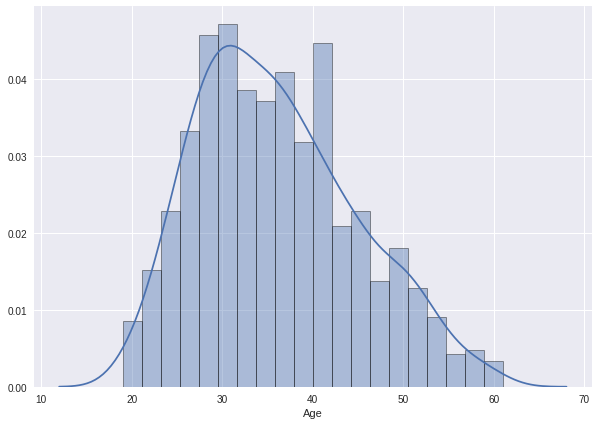

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(dataframe['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [0]:
print('Age of the oldest person:', dataframe['Age'].max(), 'Years')
print('Age of the youngest person:', dataframe['Age'].min(), 'Years')
print('Average age in dataset:', dataframe['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


## What is the income distribution in different age groups? 

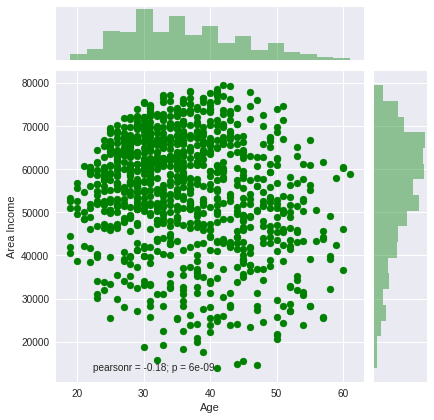

In [0]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= dataframe)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

## Which age group is spending maximum time on the internet? 

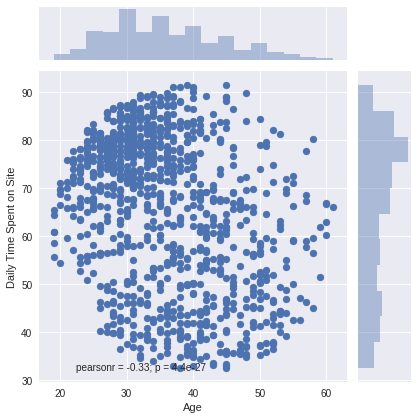

In [0]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= dataframe)

From the above plot its evident that the age group of 25-40 is most active on the internet.

## Which gender has clicked more on online ads?



In [0]:
dataframe.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Based on above data we can see that a greater number of females have clicked on ads compared to male.

## **Maximum number of internet users belong to which country in the given dataset?**

In [0]:
pd.crosstab(index=dataframe['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


Based on the above data frame we can observe that maximum number of users are from France and Czech.

## Did we match our baseline that we set?

In [0]:
dataframe.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


# What is the relationship between different features?

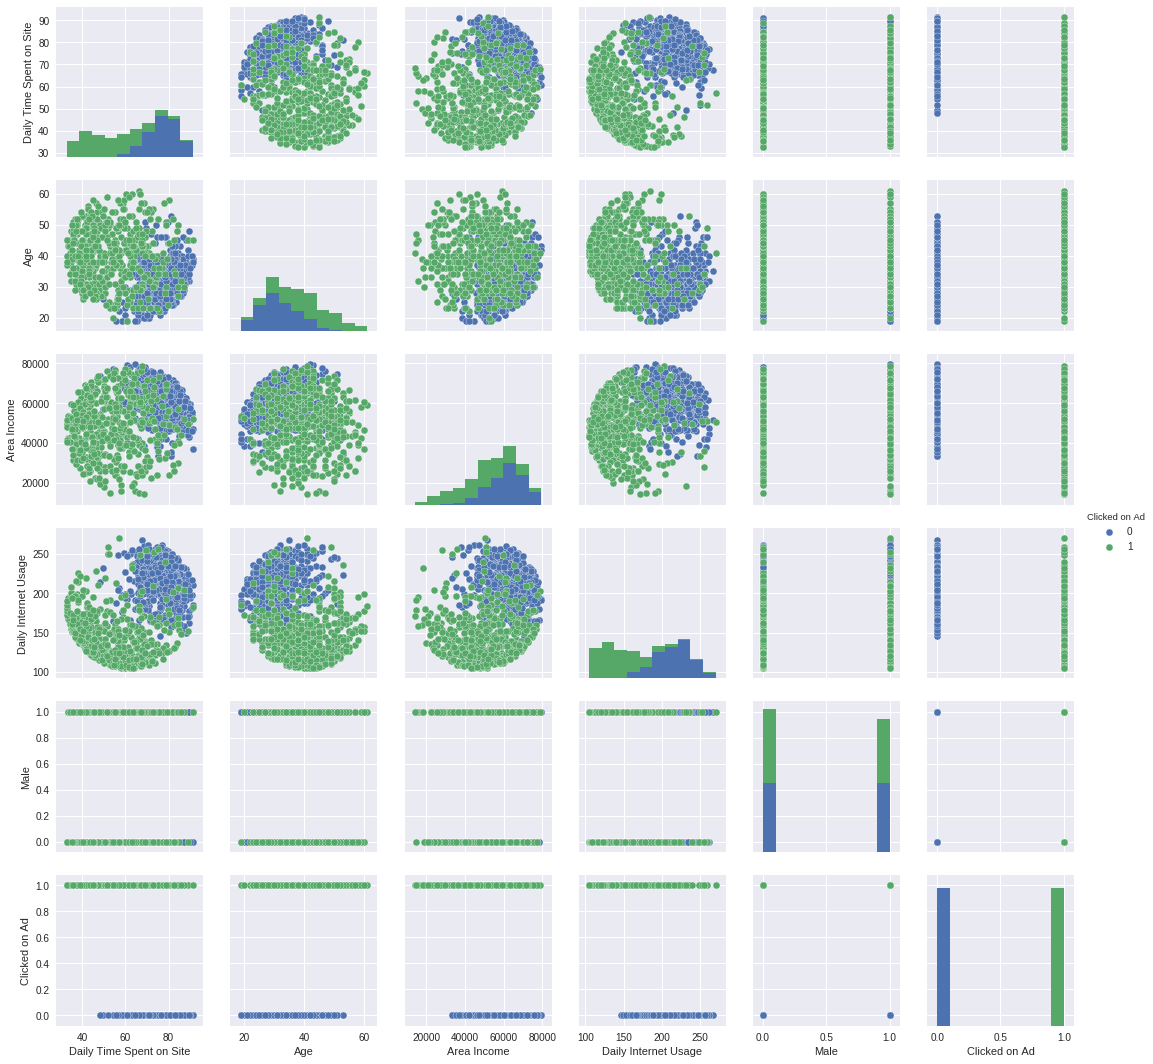

In [0]:
sns.pairplot(dataframe, hue='Clicked on Ad')

# Data Cleaning

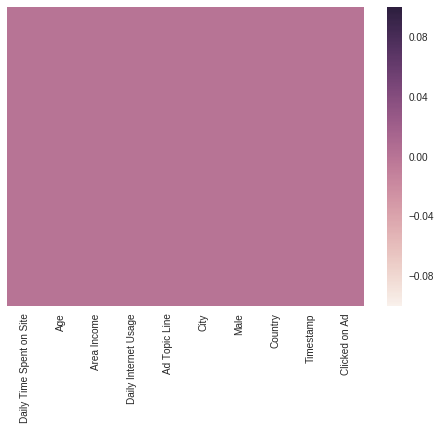

In [0]:
sns.heatmap(dataframe.isnull(), yticklabels=False)

As we see, we don't have any missing data

Considering the 'Advertisement Topic Line', we decided to drop it. In any case, if we need to extract any form of interesting data from it, we can use Natural Language Processing.

As to 'City' and the 'Nation', we can supplant them by dummy variables with numerical features, Nonetheless, along these lines we got such a large number of new highlights.

Another methodology would be thinking about them as a categorical features and coding them in one numeric element.

Changing 'Timestamp' into numerical value is more complicated. So, we can change ‘Timestamp’ to numbers or convert them to spaces of time/day and consider it to be categorical and afterwards we converted it into numerical values. And we selected the month and the hour from the timestamp as features

In [0]:
dataframe['City Codes']= dataframe['City'].astype('category').cat.codes

In [0]:
dataframe['Country Codes'] = dataframe['Country'].astype('category').cat.codes

In [0]:
dataframe[['City Codes','Country Codes']].head(5)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [0]:
dataframe['Month'] = dataframe['Timestamp'].apply(lambda x: x.split('-')[1])
dataframe['Hour'] = dataframe['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [0]:
dataframe[['Month','Hour']].head(5)

,Month,Hour
0,03,00
1,04,01
2,03,20
3,01,02
4,06,03


# Data Model Implementation

Dropping 

In [0]:
X = dataframe.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [0]:
Y = dataframe['Clicked on Ad']

**Splitting Dataset**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

**Implementing Logistic Regression Model**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg_model = LogisticRegression()

In [0]:
log_reg_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
log_reg_pred = log_reg_model.predict(X_test)

**Implementing Naive Bayes Model**

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nav_bayes_model = GaussianNB()

In [0]:
nav_bayes_model.fit(X_train, Y_train)

GaussianNB(priors=None)

In [0]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

**Implementing Decision Tree Model**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dec_tree_model = DecisionTreeClassifier()

In [0]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
dec_tree_pred = dec_tree_model.predict(X_test)

**Finding accuracy in each model**

In [0]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [0]:
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

90.0


### Naive Bayes

In [0]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

96.0


### Decision Tree

In [0]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

93.33333333333333


# Conclusion

### Comparing all the above implementation models, we conclude that Naive Bayes Algorithm gives us the maximum accuracy for determining the click  probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it. 